# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [2]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [4]:
features = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price',
            'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

target = 'fraud'

X = fraud[features]
y = fraud[target]

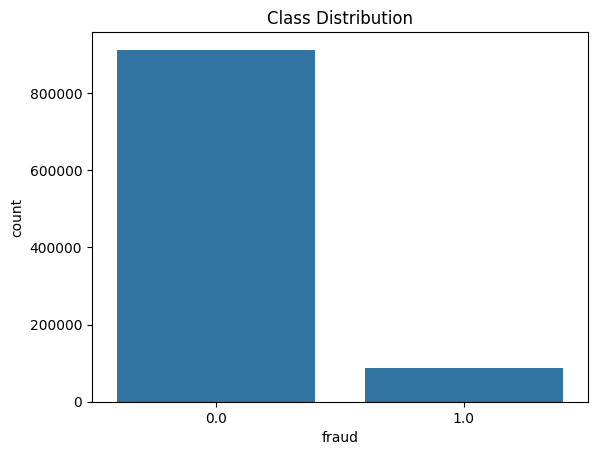

In [5]:
#1 

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='fraud', data=fraud)
plt.title("Class Distribution")
plt.show()

In [6]:
print(fraud['fraud'].value_counts(normalize=True))


fraud
0.0    0.912597
1.0    0.087403
Name: proportion, dtype: float64


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Assuming X and y are your features and target

# Split data with stratification to keep class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Initialize Logistic Regression with balanced class weights
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Train the model
logreg.fit(X_train, y_train)

# Predict on test data
y_pred = logreg.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.934775
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



highly imbalanced dataset

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.934775
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



when the model says “fraud,” it’s correct 58% of the time.

Model catches  95% of actual fraud cases.

F1-score balances precision and recall to 72% for fraud.



In [9]:
fraud_subset = fraud[[
    'distance_from_home',
    'distance_from_last_transaction',
    'ratio_to_median_purchase_price',
    'repeat_retailer',
    'used_chip',
    'used_pin_number',
    'online_order',
    'fraud'
]]

fraud_0 = fraud_subset[fraud_subset['fraud'] == 0]  
fraud_1 = fraud_subset[fraud_subset['fraud'] == 1] 

from sklearn.utils import resample

fraud_1_oversampled = resample(
    fraud_1,
    replace=True,
    n_samples=len(fraud_0),  
    random_state=42
)

fraud_balanced = pd.concat([fraud_0, fraud_1_oversampled])
fraud_balanced = fraud_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

X = fraud_balanced.drop('fraud', axis=1)
y = fraud_balanced['fraud']

In [10]:
logreg = LogisticRegression(max_iter=1000, random_state=42)

# 3. Train the model
logreg.fit(X_train, y_train)

# 4. Predict on test data
y_pred = logreg.predict(X_test)

# 5. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.95928
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182519
         1.0       0.90      0.60      0.72     17481

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000



In [11]:
from sklearn.utils import resample

fraud_0_downsampled = resample(
    fraud_0,
    replace=False,               
    n_samples=len(fraud_1),      
    random_state=42
)

fraud_balanced = pd.concat([fraud_0_downsampled, fraud_1])

fraud_balanced = fraud_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


In [13]:
logreg = LogisticRegression(max_iter=1000, random_state=42)

# 3. Train the model
logreg.fit(X_train, y_train)

# 4. Predict on test data
y_pred = logreg.predict(X_test)

# 5. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.95928
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182519
         1.0       0.90      0.60      0.72     17481

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000



In [14]:
from imblearn.over_sampling import RandomOverSampler
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Oversample minority class in training set
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print("Before oversampling:", y_train.value_counts())
print("After oversampling:", y_train_ros.value_counts())

# Train logistic regression on oversampled data
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_ros, y_train_ros)

# Predict & evaluate
y_pred_ros = logreg.predict(X_test)
print("Oversampling Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_ros))
print(classification_report(y_test, y_pred_ros))


Before oversampling: fraud
1.0    730078
0.0    730077
Name: count, dtype: int64
After oversampling: fraud
0.0    730078
1.0    730078
Name: count, dtype: int64
Oversampling Results:
Accuracy: 0.9411076624689416
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94    182520
         1.0       0.93      0.95      0.94    182519

    accuracy                           0.94    365039
   macro avg       0.94      0.94      0.94    365039
weighted avg       0.94      0.94      0.94    365039



In [15]:
from imblearn.under_sampling import RandomUnderSampler

# Undersample majority class in training set
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print("Before undersampling:", y_train.value_counts())
print("After undersampling:", y_train_rus.value_counts())

# Train logistic regression on undersampled data
logreg.fit(X_train_rus, y_train_rus)

# Predict & evaluate
y_pred_rus = logreg.predict(X_test)
print("Undersampling Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rus))
print(classification_report(y_test, y_pred_rus))


Before undersampling: fraud
1.0    730078
0.0    730077
Name: count, dtype: int64
After undersampling: fraud
0.0    730077
1.0    730077
Name: count, dtype: int64
Undersampling Results:
Accuracy: 0.9411049230356209
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94    182520
         1.0       0.93      0.95      0.94    182519

    accuracy                           0.94    365039
   macro avg       0.94      0.94      0.94    365039
weighted avg       0.94      0.94      0.94    365039



In [16]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

# Train logistic regression on SMOTE data
logreg.fit(X_train_smote, y_train_smote)

# Predict & evaluate
y_pred_smote = logreg.predict(X_test)
print("SMOTE Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))


Before SMOTE: fraud
1.0    730078
0.0    730077
Name: count, dtype: int64
After SMOTE: fraud
0.0    730078
1.0    730078
Name: count, dtype: int64
SMOTE Results:
Accuracy: 0.9410967047356584
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94    182520
         1.0       0.93      0.95      0.94    182519

    accuracy                           0.94    365039
   macro avg       0.94      0.94      0.94    365039
weighted avg       0.94      0.94      0.94    365039

